<a href="https://colab.research.google.com/github/Sreekar22/ANN_bank_churn_predection/blob/main/ANN_Project_Bank_Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **For Dataset vist below link:**
https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

# 1.   **Introduction:**
We aim to accomplist the following for this study:


1. Identify and visualize which factors contribute to customer churn:
2. Build a prediction model that will perform the following:
    * Classify if a customer is going to churn or not
    * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn




In [ ]:
#importing required libraries
import numpy as np  #for maths,linear algebra
import pandas as pd #for data preparation(data cleaning,data merging,data processing,data manupilation)
import matplotlib.pyplot as plt #for data visualization(graphs,plots etc)
%matplotlib inline
#for printing plots in outputs rather than seprate window
import seaborn as sns #for statistical analysis of data
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn import metrics

# to tune different models
from sklearn.model_selection import train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)
# library to encoding
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#import tenorflow
import tensorflow as tf
from tensorflow import keras as K

# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# to tune different models
from sklearn.model_selection import train_test_split

## 2.Data set review & preparation
now we try to understand,explore,clean the data
1.  To read dataset then understading exploring dataset
2.  And to prepare the sets for exploratory and prediction tasks as described in above



In [ ]:
#reading the data into data frame
df=pd.read_csv("Churn_Modelling.csv")
df.shape
#It means that our data frame has 10000 rows with 14 attributes.We also should check which attributes will be necessary.

(10000, 14)

In [ ]:
#check for null or missing values in column list
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Thankfully,our dataset is onpoint.
This is rare as it has no missing vales

In [ ]:
#Calculating count of each and every variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes(as it is different for each and every coustmer) . It is borderline with the surname as this would result to profiling so we exclude this as well.

In [ ]:
#removing the elemnts as said above
df=df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head()#reviewing the top rows of what's left in df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


From the above, a couple of question linger:

1. From the data it is clear that it has been recorded at some point in time e.g. the balance is for a given date which leaves a lot of questions:
    
*    What date is it and of what relevance is this date
*    Can we somehow get the balance over a period time(like timecasting) unlike a single date.
2. There are customers who have exited but still have a balance in their account! What is the meaning of this abnormality? Could they have exited from a product and not the bank?

In [ ]:
#let's check the datatype to see how many are catrgorical variables and how many continous variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


So we moslty have *categorical* variables and *5 continuous* variables

## 3. Data Analysis
Let's get started on some exploratary data analysis
Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status

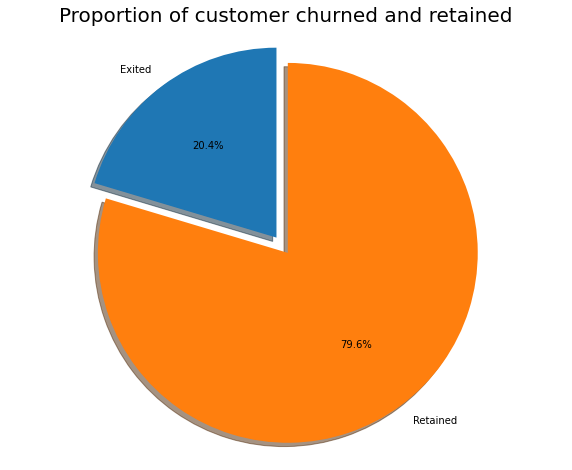

In [ ]:
labels = 'Exited', 'Retained' #Labeling
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()] #From Exited Coloumn counting
#how many have exited the bank and haow many are active
explode = (0, 0.1)#explode a pie chart means to make one of the wedges of the pie chart to stand out.
fig1, ax1 = plt.subplots(figsize=(10, 8)) #Rather than creating a single axes, this function creates a full grid of
# equal-sized axes in a single line,returning them in a NumPy array.we need to specify the no of rows and columns
#as an argument to the subplots() function.
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', #string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So,about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.



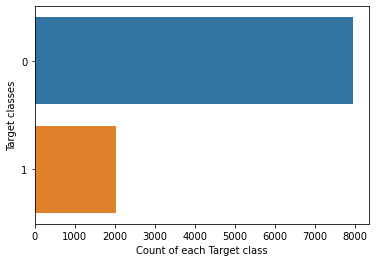

In [ ]:
sns.countplot(y=df.Exited ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

This is more of a statistical view

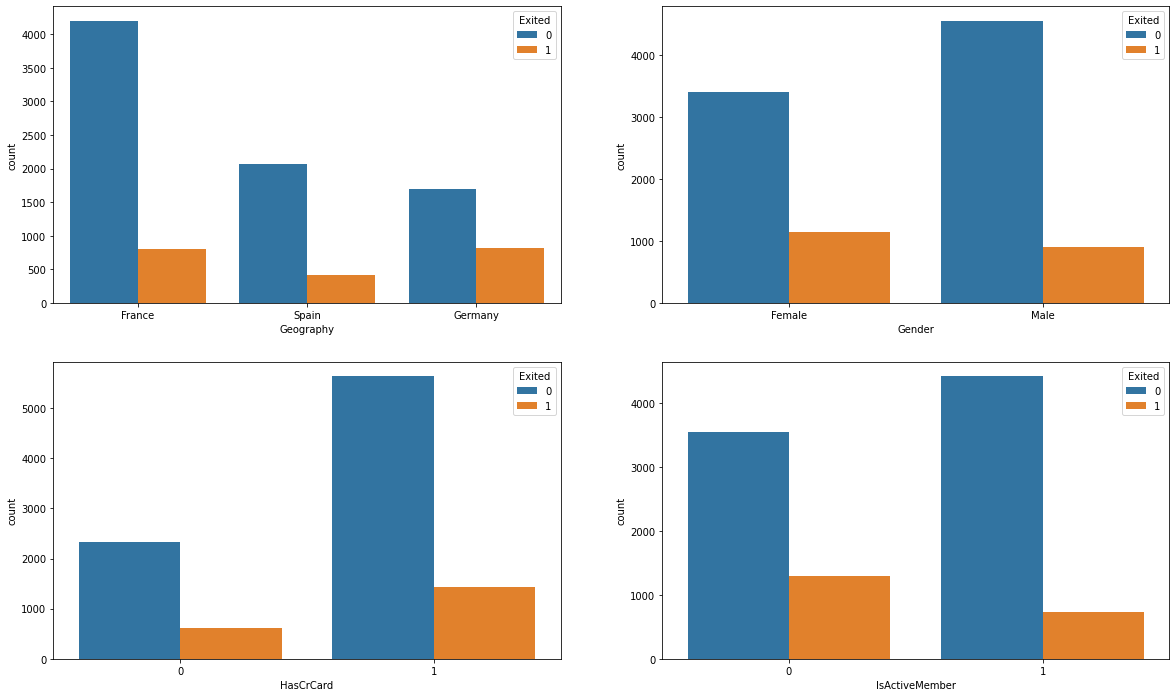

In [ ]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])#Relation of exited with Geography
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])#Relation of exited with Gender
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])#Relation of exited with holding a creditcard
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])#Relation of exited with activity of a member

From above graphs it is evident that


*  Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
*   The proportion of female customers churning is also greater than that of male customers
*  Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

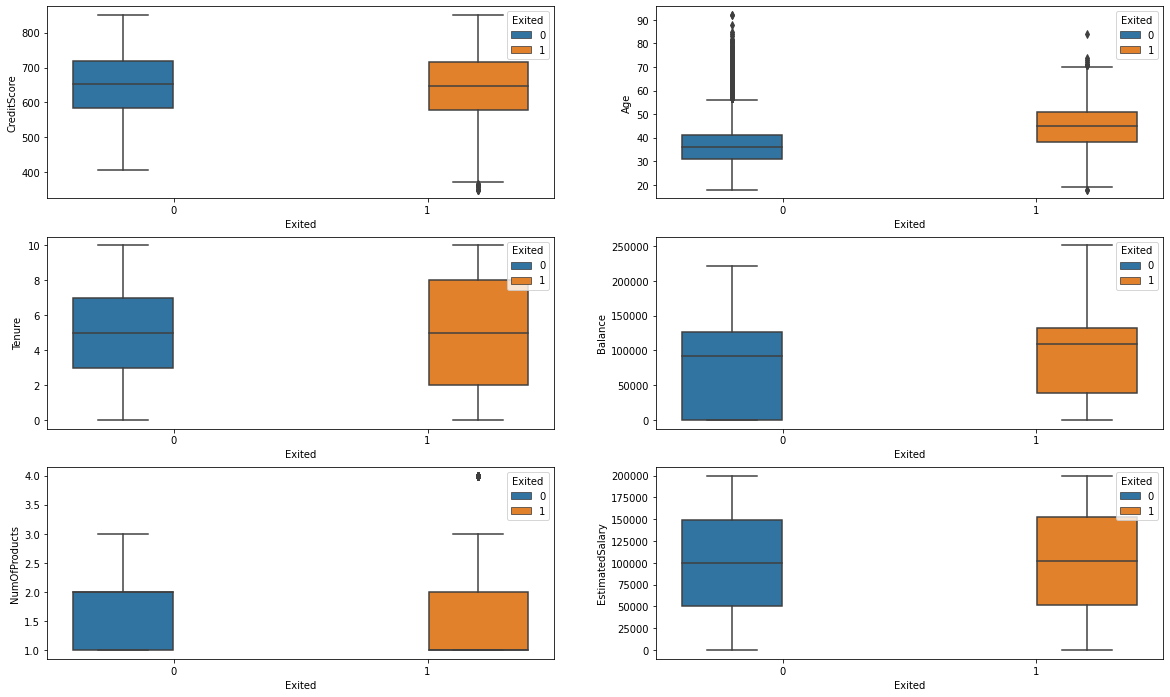

In [ ]:
#box plots to visuliaze data more accurately
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

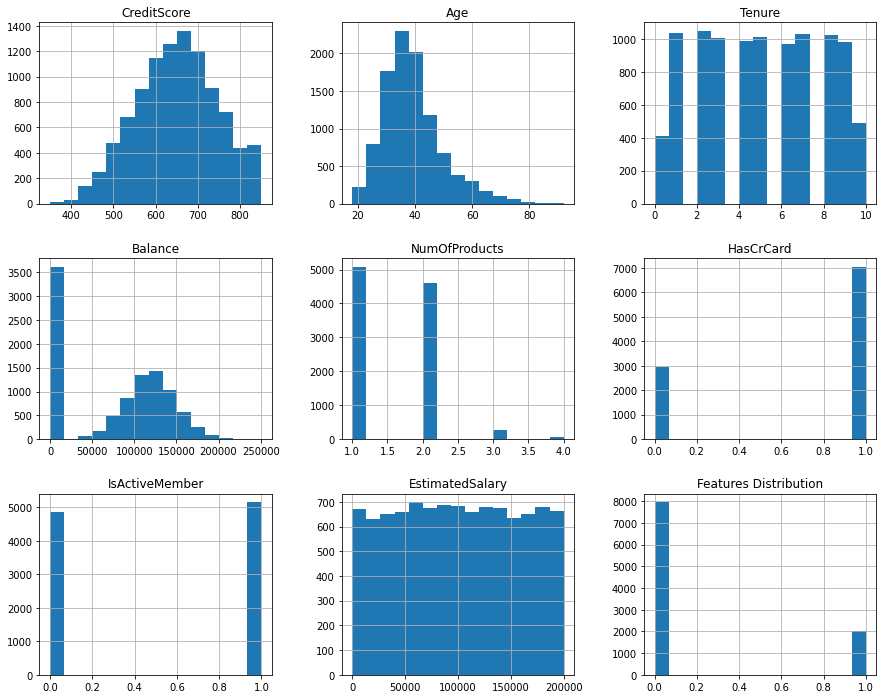

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

The above diagram shows histogram of many features and it's behavouir


In [ ]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

The above code snippet is for defining the dependent and independent variables
In coming few we encode the data so that it can be ready for modelling

In [ ]:
# handle categorical variables:
# transform Geography
geography=pd.get_dummies(X['Geography'],drop_first=True)

#transform Gender
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concat the new variables into the dataset
X=pd.concat([X,geography,gender],axis=1)

#drop column which are redundant and of no use
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head() #To check sample of data after encoding

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


As of now data is ready for modeling
Now comes the fun part
# Splitting the data into trainng set and testing set
We split the dataset into 30/70
Also we use stratify to maintain the original distribution of Dependent variable as of original set



In [ ]:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

## Scalling
Scale the features with use of StandardScaler() to transform the train and test sets


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Now let's build a ANN
Points to note beofre bulding ANN

*   Predicting that customer will leave and the customer stays with bank.(or) predicting that customer will stay, but the customer actually leaves the bank.


1.   Model-1
     * We will use a simple NN made of 3 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (relu activation function) and classify either the customer will leave bank or not.




In [ ]:
model = Sequential() #Intiliazing Model

In [ ]:
#Adding Layers
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=5, input_dim = 11,activation='relu'))   # input of 11 columns as shown above

# hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='sigmoid'))

# Adding the output layer
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification -->> leaving or not

In [ ]:
# Create optimizer with default learning rate
# Compile the model
#As it is a binary classfication problem we use binary cross entropy for loss function
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Now let's see what we built till now
#printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 60        
                                                                 
 dense_12 (Dense)            (None, 128)               768       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,469
Trainable params: 17,469
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [ ]:
history=model.fit(X_train,y_train,batch_size=25,epochs=1000,validation_split=0.2)
#Let's start with fitting the model with 10 batches and 10 epochs and validation_split of 20%
#and as we go on we can change it based on our requirment

Epoch 1/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.8005 - val_loss: 0.4771 - val_accuracy: 0.7807
Epoch 2/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.8098 - val_loss: 0.4477 - val_accuracy: 0.8093
Epoch 3/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.8182 - val_loss: 0.4376 - val_accuracy: 0.8179
Epoch 4/1000
224/224 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8188 - val_loss: 0.4370 - val_accuracy: 0.8114
Epoch 5/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8239 - val_loss: 0.4218 - val_accuracy: 0.8193
Epoch 6/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.4032 - accuracy: 0.8300 - val_loss: 0.4114 - val_accuracy: 0.8343
Epoch 7/1000
224/224 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8338 - val_loss: 0.4090 - val_accuracy:

Checking training and test loss

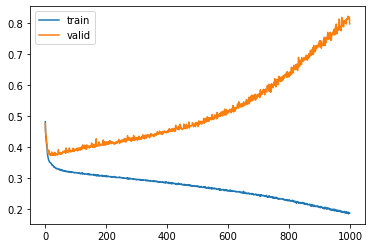

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

As we can see the both losses gardually decrsead as no.of epoachs incresead
## Evaluating Model


In [ ]:
# use evaluate function
score1 = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.8240


###Observations:

1. We see that the model has acheived around 85% accuracy
2. We have noticed that the dataset is imbalanced and contains less records of customers that have exited the bank. With this data the model will be able to identify the customer that is willing to leave about 85 times out of 100.

Confusion Matrix:


In [ ]:
## Confusion Matrix on unsee test set
# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Will Stay','Will Leave']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

NameError: ignored

# Observations:


*   First I have tried trining with 10 epoachs,accuracy was 85%
*   Then I have tried with 100 epoachs then accuracy was 86%
*   At last,I have tried 10000 epoachs and final accuracy that I have acihevied is 89%




Now Let's see if a random hypothetical customer will leave bank or not through our ANN
Evaluating the  model


*   Geography: France
*   Credit Score: 600
*   Gender: Male
*   Age: 40 years old
*   Tenure: 3 years
*   Balance:$$60000
*   Number of Products: 2
*   Does this customer have a credit card? Yes
*   Is this customer an Active Member: Yes
*   Estimated Salary: $ 50000

In [ ]:
# we get the probability of this person leaving the bank.
print(model.predict(scaler.transform([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]])))

[[0.01807618]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


So,our model says that this customer will stay


##Conclusions:


*   There was imbalance in data, as it contains only 20% exited customers. This must be fixed for future analysis
*   The bank can run the model to achieve desired performance levels for new data, also to offer better services to customers.
*   More data points can be added to dataset for better analysis in future.
*   Age, Location, EstimatedSalary and CreditScore can be considered to devise a segementation based marketing, promotion and rewards strategy.
*   It is seen that most customers are from France and bank should improve the marketing strategy for other Geographies (Spain, Germany)
*  Bank has to focus on getting customers to use Bank products more often, almost 50% customers are not actively using the products.

